# <font color='red'>Implement Forward and Back Propagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, these are the test functions.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)

X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>

*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>REF: Check this video for better understanding of the computational graphs and back propagation</font>

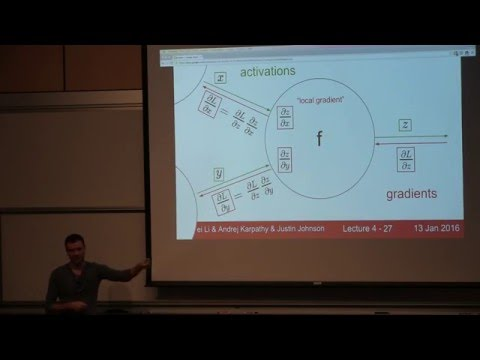

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="950",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

<pre>
  <font color='green'>
  def forward_propagation(X, y, W):
    <font color='grey'>
    # X: input data point, 5-d data points
    # y: output varible
    # W: weight array, its of length 9, <br>          W[0] corresponds to w1 in graph, <br>          W[1] corresponds to w2 in graph, <br>          ..., <br>          W[8] corresponds to w9 in graph. 

    # we will return the following variables
    # exp = part1 (compute the forward propagation until exp and then store the values in exp)
    # tanh = part2(compute the forward propagation until tanh and then store the values in tanh)
    # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
    # now compute remaining values from computional graph and get y'
    # compute the value of L=(y-y')^2
    # compute derivative of L  w.r.to Y' and store it in dl
    # Create a dictionary to store all the intermediate values
    # store L, exp, tanh, sig, dl variables
    </font>
    return (dictionary, which we might need to use for back propagation)
  </font>
</pre>

*  <b>Backward propagation</b>(code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # compute the gradients of each weight [w1,w2,w3,...,w9]
        # dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

## <font color='blue'>Forward propagation </font>

In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    return 1 / (1 + math.exp(-z))

def tanh(z):
    '''In this function, we will compute the tanh(z)'''
    return (math.exp(z) - math.exp(-z)) / (math.exp(z) + math.exp(-z))
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        
        # Return the following variables
        # exp = part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh = part2 (compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3 (compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables
        
        #print("%"*100, w)
        # exp
        
        mul1 = np.dot(w[0], x[0])
        mul2 = np.dot(w[1], x[1])
        add1 = mul1 + mul2; add2 = mul1 + mul2
        mul3 = np.dot(add1, add2)
        add3 = mul3 + w[5]
        exp_ = math.exp(add3)
        
        # tanh
        tanh_ = tanh(exp_ + w[6])
        
        # sigmoid
        sin_ = math.sin( np.dot(w[2], x[2]) )
        add4 = np.dot(w[3], x[3]) + np.dot(w[4], x[4])
        mul4 = np.dot(sin_, add4)
        sig_ = sigmoid(mul4 + w[7])
        
        y_hat = tanh_ + np.dot(sig_, w[8])
        l = (y-y_hat)**2
    
        dl = 2*(y-y_hat)*-1
        
        d = {"dl":dl, "loss":l, "exp":exp_, "tanh":tanh_, "sigmoid":sig_, "sin":sin_, 
             "mul1":mul1, "mul2":mul2, "add1":add1, "add2":add2, "add4":add4}
        #print("%"*100, d)
        return d

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [6]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss = (np.round(data['loss'],4)==0.9298)
    part1 = (np.round(data['exp'],4)==1.1273)
    part2 = (np.round(data['tanh'],4)==0.8418)
    part3 = (np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w = np.ones(9)*0.1
d1 = forward_propagation(X[0],y[0],w)
#print(d1)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [7]:
def backward_propagation(x,w,dic):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    
    # compute the gradients of each weight [w1, w2, w3, ..., w9]
    # use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9

    # return dW, dW is a dictionary with gradients of all the weights
    #print("^"*100, w)
    
    dW = dict()
    dW['dw9'] = np.dot(dic['dl'], dic['sigmoid'])
    dW['dw8'] = np.dot(dic['sigmoid'], (1-dic['sigmoid'])) * np.dot(w[8], dic['dl'])
    dW['dw7'] = (1 - (dic['tanh']**2)) * dic['dl']
    dW['dw6'] = np.dot(dic['exp'], dW['dw7'])
    dW['dw5'] = np.dot(dW['dw8'], dic['sin']) * x[4]
    dW['dw4'] = np.dot(dW['dw8'], dic['sin']) * x[3]
    dW['dw3'] = (math.cos(dic['sin']) * (dW['dw8'] * dic['add4'])) * x[2]
    dW['dw2'] = ((dW['dw6'] * dic['add1']) * x[1]) + ((dW['dw6'] * dic['add2']) * x[1])
    dW['dw1'] = ((dW['dw6'] * dic['add1']) * x[0]) + ((dW['dw6'] * dic['add2']) * x[0])
    
    #print(dW)
    return dW    
    

<font color='cyan'>Grader function - 3 </font>

In [8]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
#print(d1)
d1=backward_propagation(X[0],w,d1)
#print(d1)
grader_backprop(d1)

True

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let's calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in our implementation. If the value exceeds 1e-3, then we are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

we can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (code in <font color='blue'> def gradient_checking()</font>)

**Algorithm**

<pre>
<font color='green'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []

    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>

    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>

<b>NOTE: we can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not we have bug in our code
</pre></b>

## <font color='blue'> Implement gradient checking</font>

In [10]:
# Ref: https://cs231n.github.io/neural-networks-3/
def gradient_checking(x, y, w_, e):
    d_ = forward_propagation(x, y, w_)
    gr = backward_propagation(x, w_, d_)
    gr = list(gr.values())
    
    approx_gradients = []
    for wi in range(len(w_)):
        wi_plus = np.copy(w_)
        wi_plus[wi] = wi_plus[wi]+e
        dwi_plus = forward_propagation(x, y, wi_plus)
        
        wi_minus = np.copy(w_)
        wi_minus[wi] = wi_minus[wi]-e
        dwi_minus = forward_propagation(x, y, wi_minus)
        
        approx_gr = (dwi_plus['loss'] - dwi_minus['loss']) / (2*e)
        approx_gradients.append(approx_gr)
        
    '''
    num = np.linalg.norm(np.array(gr) - np.array(approx_gradients))
    den = max(np.linalg.norm(gr) , np.linalg.norm(approx_gradients))
    diff = num / den
    '''
    diff_ = []
    for g, a in zip(gr[::-1], approx_gradients):
        diff = (g-a) / (g+a)
        diff_.append(diff)
        
        if diff < e:
            print("The gradient is correct", g, a, diff)
        else:
            print("The gradient is wrong", g, a, diff)
    
    return diff_
    

In [11]:
W = np.random.normal(0, 0.1, 9)
e = 0.0001

In [12]:
gradient_checking(X[0], y[0], W, e)

The gradient is correct 0.17294673635552799 0.17294673418599693 6.2722521226288806e-09
The gradient is correct 0.016115983822719955 0.01611598382189605 2.5561686290841648e-11
The gradient is correct 0.009758163765861683 0.009758137990978355 1.3206848125991673e-06
The gradient is correct -0.0021562610407846253 -0.002156261038610552 5.041303861788948e-10
The gradient is correct -0.00046649655226664355 -0.00046649655360830877 -1.4380226547039143e-09
The gradient is correct -1.0965466022917905 -1.096546599130832 1.44132423641611e-09
The gradient is correct -1.1591608760219467 -1.1591608814687238 -2.3494482643776186e-09
The gradient is correct -0.05132840745289063 -0.05132840740773581 4.3986185862586795e-10
The gradient is correct -1.1125189478801314 -1.1125189478811137 -4.4148701200087144e-13


[6.2722521226288806e-09,
 2.5561686290841648e-11,
 1.3206848125991673e-06,
 5.041303861788948e-10,
 -1.4380226547039143e-09,
 1.44132423641611e-09,
 -2.3494482643776186e-09,
 4.3986185862586795e-10,
 -4.4148701200087144e-13]